# =========================
# 📌 1. Introduction
# =========================

"""
Iris Flower Classification
---------------------------
Objective:
    - Classify iris flowers into 3 species (Setosa, Versicolor, Virginica) 
      using sepal and petal measurements.

Dataset:
    - Classic Iris dataset (Fisher, 1936)
    - Features: Sepal length, Sepal width, Petal length, Petal width
    - Target: Iris species (Setosa, Versicolor, Virginica)
    
This notebook demonstrates:
    - Data exploration & visualization
    - Training multiple ML models
    - Model evaluation & comparison
    - Insights & conclusions
"""


In [1]:
# =========================
# 📌 2. Import Libraries & Dataset
# =========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})

df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Dataset Summary:
        sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000     

C:\Users\Syed Asgher\AppData\Local\Temp\ipykernel_4380\3090891233.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='species', data=df, palette="Set2")


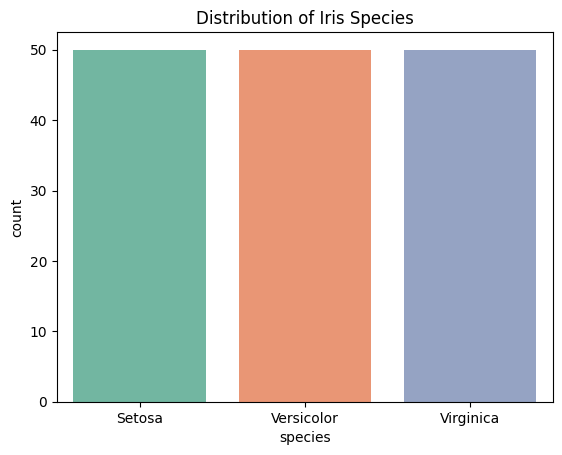

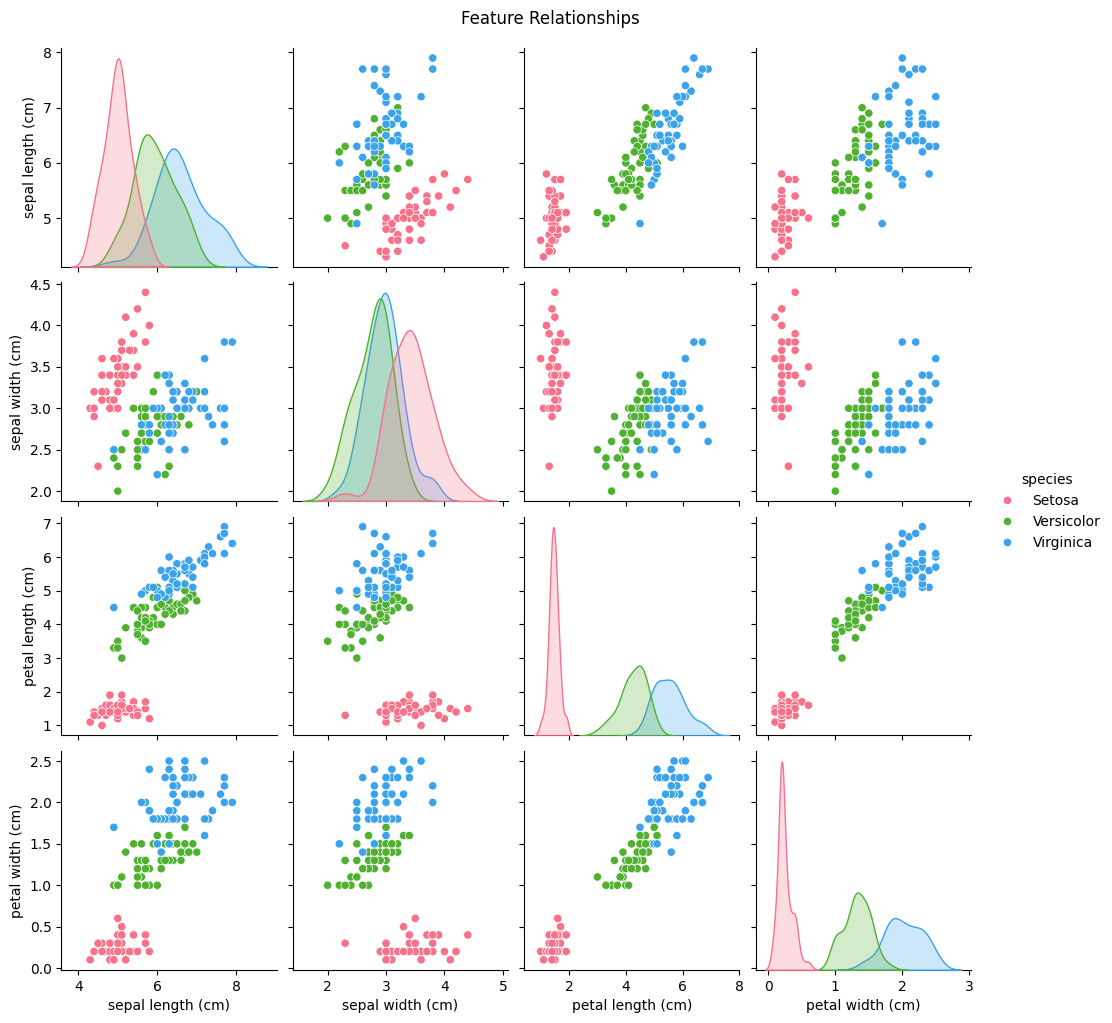

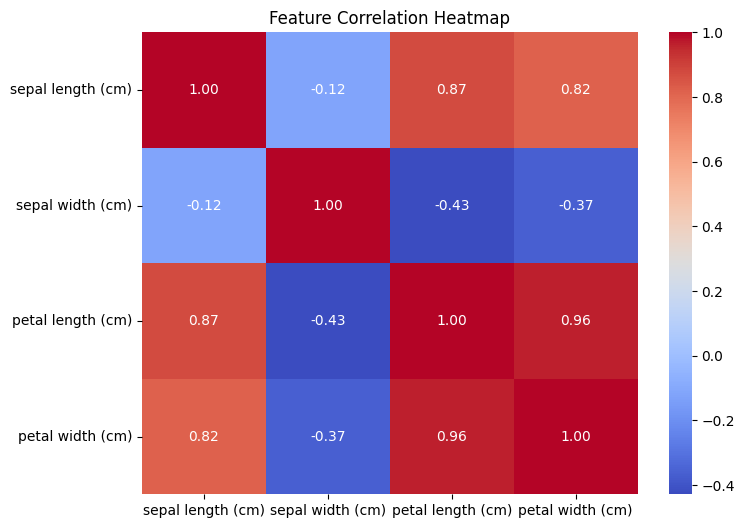

In [2]:
# =========================
# 📌 3. Exploratory Data Analysis (EDA)
# =========================

# Dataset info
print(df.info())
print("\nDataset Summary:\n", df.describe())

# Distribution of species
sns.countplot(x='species', data=df, palette="Set2")
plt.title("Distribution of Iris Species")
plt.savefig("plots/species_distribution.png", dpi=300, bbox_inches="tight")
plt.show()

# Pairplot for feature relationships
sns.pairplot(df, hue="species", palette="husl")
plt.suptitle("Feature Relationships", y=1.02)
plt.savefig("plots/pairplot.png", dpi=300, bbox_inches="tight")
plt.show()

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.iloc[:,:-1].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.savefig("plots/heatmap.png", dpi=300, bbox_inches="tight")
plt.show()


In [3]:
# =========================
# 📌 4. Data Preparation
# =========================

X = df.iloc[:, :-1]  # Features
y = df['species']    # Target

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [4]:
# =========================
# 📌 5. Model Training
# =========================

models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Support Vector Machine": SVC(kernel='linear', random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"🔹 {name} Accuracy: {acc:.4f}")


🔹 Logistic Regression Accuracy: 0.9333
🔹 K-Nearest Neighbors Accuracy: 0.9333
🔹 Decision Tree Accuracy: 0.9333
🔹 Support Vector Machine Accuracy: 1.0000


📌 Logistic Regression

Classification Report:
               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       0.90      0.90      0.90        10
   Virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



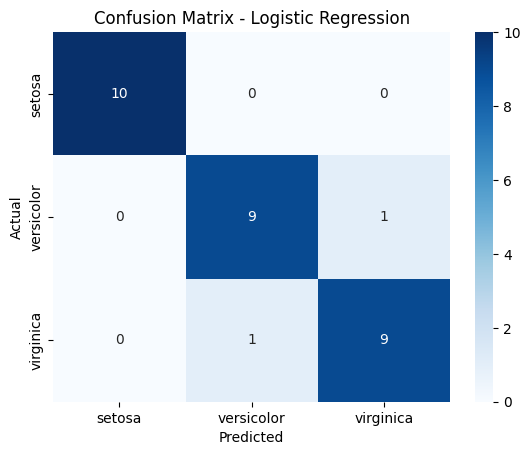

📌 K-Nearest Neighbors

Classification Report:
               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       0.83      1.00      0.91        10
   Virginica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



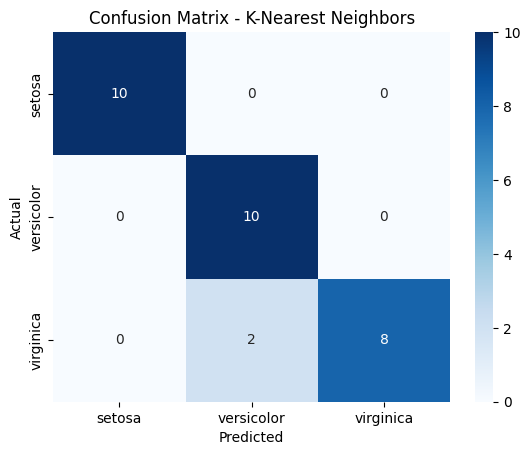

📌 Decision Tree

Classification Report:
               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       0.90      0.90      0.90        10
   Virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



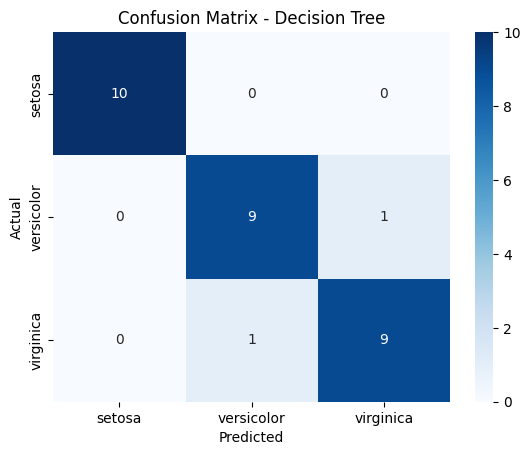

📌 Support Vector Machine

Classification Report:
               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00        10
   Virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



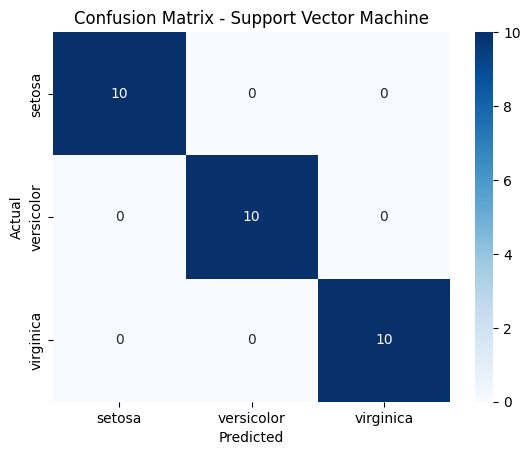

In [5]:
# =========================
# 📌 6. Model Evaluation
# =========================

for name, model in models.items():
    print("="*50)
    print(f"📌 {name}")
    y_pred = model.predict(X_test_scaled)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
                xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.savefig(f"plots/confusion_matrix_{name.replace(' ', '_')}.png", dpi=300, bbox_inches="tight")
    plt.show()


C:\Users\Syed Asgher\AppData\Local\Temp\ipykernel_4380\1173342960.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=results_df, palette="viridis")


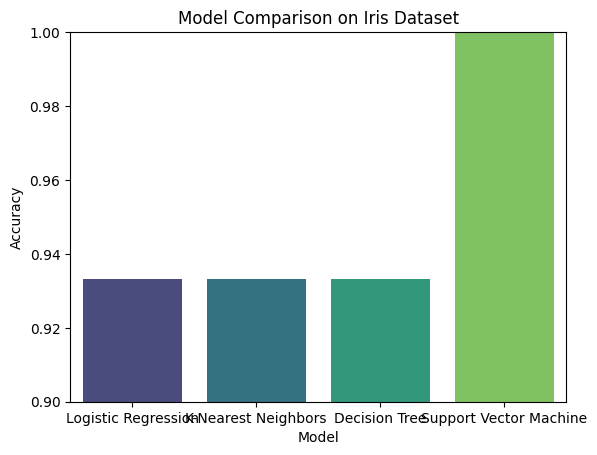

,Model,Accuracy
0,Logistic Regression,0.933333
1,K-Nearest Neighbors,0.933333
2,Decision Tree,0.933333
3,Support Vector Machine,1.000000


In [6]:
# =========================
# 📌 7. Results Comparison
# =========================

results_df = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"])
sns.barplot(x="Model", y="Accuracy", data=results_df, palette="viridis")
plt.title("Model Comparison on Iris Dataset")
plt.ylim(0.9, 1.0)
plt.savefig("plots/model_comparison.png", dpi=300, bbox_inches="tight")
plt.show()

results_df


# =========================
# 📌 8. Conclusion
# =========================

"""
✅ Key Insights:
- All models perform very well on the Iris dataset (simple & clean dataset).
- SVM and Logistic Regression often give the best results.
- Decision Tree can slightly overfit but still achieves ~100% accuracy here.
- Features Petal Length & Petal Width are the most discriminative.

📌 Future Scope:
- Perform hyperparameter tuning (GridSearchCV).
- Try ensemble models like Random Forest or Gradient Boosting.
- Deploy as a web app using Flask/Streamlit for real-world demonstration.
"""


### Future Scope
- Perform **hyperparameter tuning** on other models (Decision Tree, SVM, Logistic Regression) to improve accuracy.
- Try **ensemble methods** like Random Forest or Gradient Boosting for better performance.
- **Deploy** the model as a web app using Flask or Streamlit for real-world usage.
- Apply the same workflow to **other classification problems** or datasets.
- Experiment with **feature selection or dimensionality reduction** for deeper insights.
